In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font="Verdana")
# Remove the gray background grid
sns.set_style("white")
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df_product = pd.read_csv("../csvs/product.csv")
df_process = pd.read_csv("../csvs/process.csv")

In [3]:
df_process["mean_flexibility"] = (df_process["flexibility (manually)"] + df_process["flexibility (categories)"]) / 2
df_process.loc[df_process["creator"] == "adult", "age"] = 18
df_process["age_group"] = df_process["age"].apply(
    lambda age: "early childhood" if age in [4, 5, 6] else ("middle childhood" if age in [7, 8, 9] else "adult"))

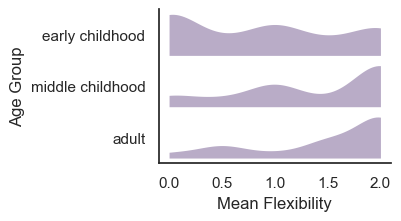

In [18]:
df_process['dummy_hue'] = 'dummy'

plt.figure(figsize=(3, 2))

# Create a one-sided violin plot with density only above the line
sns.violinplot(
    x="mean_flexibility", 
    y="age_group", 
    data=df_process, 
    scale="width", 
    inner=None, 
    linewidth=0, 
    cut=0, 
    bw=0.35, 
    split=True,
    hue='dummy_hue',  # Use the dummy hue to split the violin
    palette=["#b9a7cc"]  # Set your desired color here
)

# Overlay the data points to add clarity
# sns.stripplot(x="mean_flexibility", y="age_group", data=df_process, color='k', alpha=0.5, jitter=True)

# Customize the x-axis ticks to be at intervals of 0.5
xticks = np.arange(df_process["mean_flexibility"].min(), df_process["mean_flexibility"].max() + 0.5, 0.5)
plt.xticks(xticks)

# Set labels and title
plt.xlabel('Mean Flexibility')
plt.ylabel('Age Group')

# Adjust the plot to make it more visually appealing
sns.despine(right=True)  # Removes the left spine for a cleaner look
plt.grid(False)
plt.legend().remove()  # Remove the legend created by the dummy hue
plt.show()


In [30]:
df_product[df_product["creativity"] == " "]

,ID,creator,age,stim,inverted,category1,category2,category3,confidence,creativity,filepath
213,4011,child,4.0,G,False,creature/monster,NaN,NaN,1.0,,../data/children/stimuli_G/4011.png
